In [1]:
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def jacobi(grid, f, dx):
    newgrid = np.ones(shape=grid.shape)

    # apply evolution operator
    newgrid[1:-1,1:-1] = 0.25 * (grid[1:-1,:-2] + grid[1:-1,2:] +
                                 grid[:-2,1:-1] + grid[2:,1:-1] - f[1:-1,1:-1]*dx**2)
                    
    
    return newgrid

In [3]:
def initgrid(gridsize):
    u = np.zeros((gridsize,gridsize))
    # x = np.random.randn(gridsize,gridsize)
    u[0,:]  = 1
    u[:,-1] = 1
    u[-1,:] = 1
    u[:,0]  = 1
    
    return u

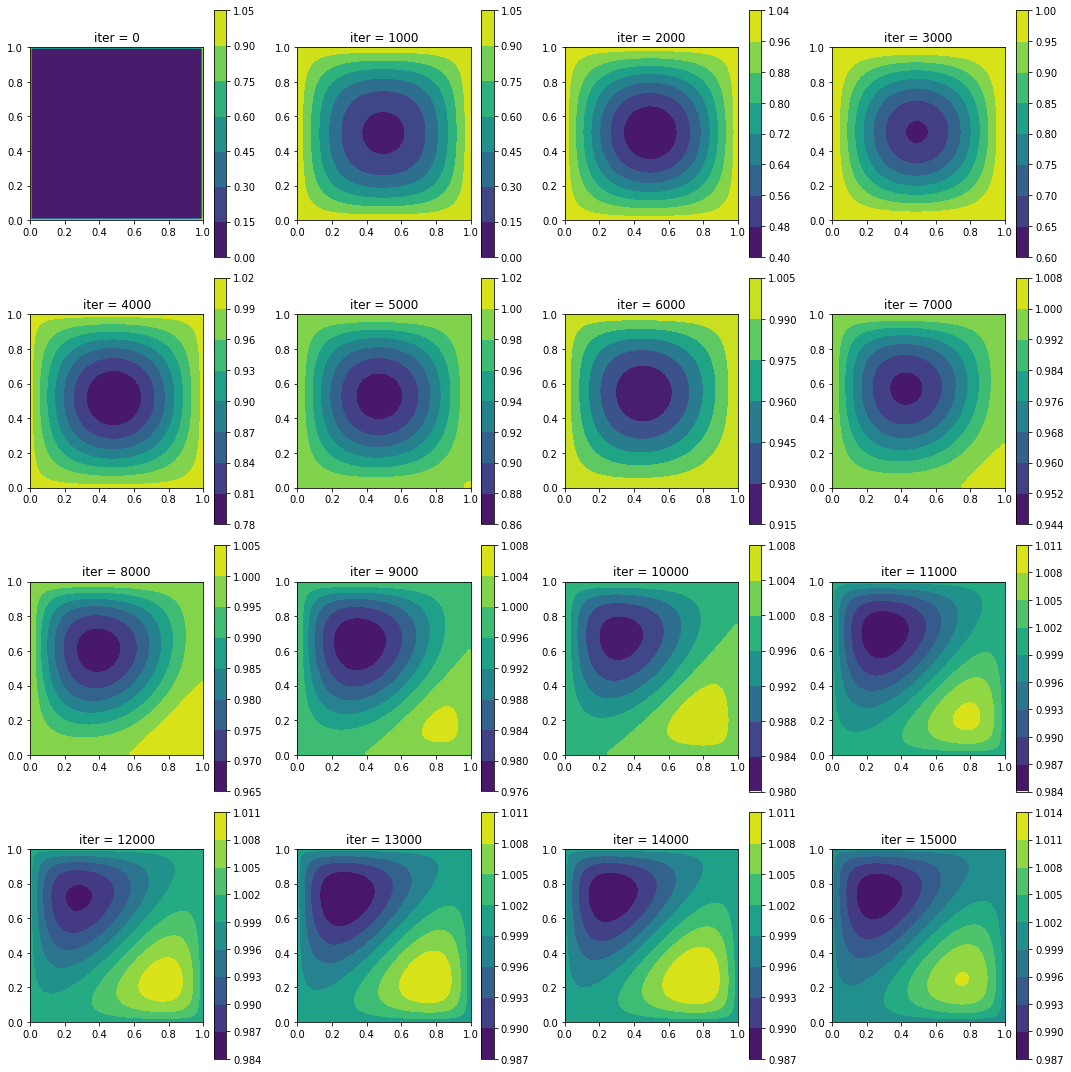

In [4]:
n = 100  # grid-size
u = initgrid(n)   # initial grid, n by n np array
L = 1.0    # square bdy length
dx = L/(n-1)   # FDM step size
x = np.linspace(0, L, n)
X, Y = np.meshgrid(x, x)  # X, Y grid
f = np.sin(X-Y)    # RHS values, n by n np array
epsilon = 1e-8
iter = 0
plt.figure(figsize=(15,15))
while True:
    if iter % 1000 == 0:
        u_old = u
        if iter < 16000:
          plt.subplot(4,4,int(iter/1000)+1)
          plt.contourf(X, Y, u.T)
          plt.gca().set_aspect('equal')
          plt.colorbar()
          plt.title('iter = %s' % iter)
          # plt.savefig('{0}.png'.format(iter))
    u = jacobi(u, f, dx)
    if iter % 1000 == 0:
        diff = np.absolute(u_old - u).max()
        if diff < epsilon:
            break
    iter = iter + 1
    
plt.tight_layout()
plt.savefig('output.png', dpi=300, bbox_inches='tight')


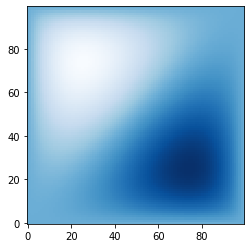

In [5]:
plt.imshow(u.T,cmap=mlt.cm.Blues,interpolation='none',origin='lower')

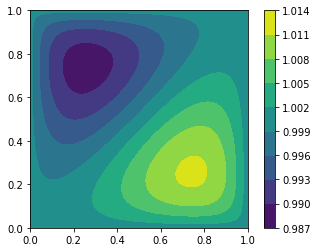

In [6]:
plt.contourf(X, Y, u.T)
plt.gca().set_aspect('equal')
plt.colorbar()
# plt.savefig('{0}.png'.format(iter))

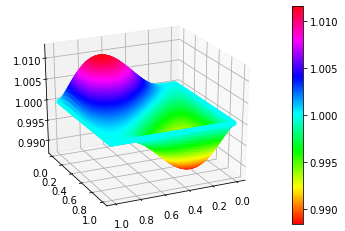

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), u.T.flatten(), color='white', edgecolors='grey', alpha=0.5)
C = ax.scatter(X, Y, u.T, c= u.T, cmap = 'hsv')
ax.view_init(25, 65)
plt.colorbar(C)
plt.show()